# Credit Card Fraud Detection

The goal of this project is to predict and classify the fraud credit card transactions. 

This dataset contains 284,807 transactions,out of which 492 belongs to fraudulent transactions, which represents 0.17% of overall transactions. Therefore, this dataset is consider highly imbalanced dataset and one of the main challenge we encounnter in this project. There are 31 columns in the data, one being called "Feature" which is the target variable with containing the value of 1 being "Fraud" and zero means "Normal"

There are few issues we encounter which makes this project challenging to predict, most noticibly 28 of the columns are anonymous and does not reveal the identify due to confidential reasons, as well as this dataset is highly imbalanced dataset to predict model.



In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ["Normal", "Fraud"]

In [517]:
data = pd.read_csv(r"C:\Users\anili\Downloads\creditcardfraud\creditcard.csv")

In [607]:
pwd

'C:\\Users\\anili'

In [518]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(data.shape[0], data.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [519]:
# Using info command to see how many missing values and the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [520]:
#Label each class to separate them

Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

In [521]:
#using shape command to see the distribution of Class feature.
print(Normal.shape, Fraud.shape)

(284315, 31) (492, 31)


Text(0, 0.5, 'Frequency')

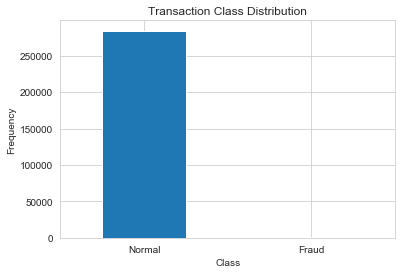

In [522]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

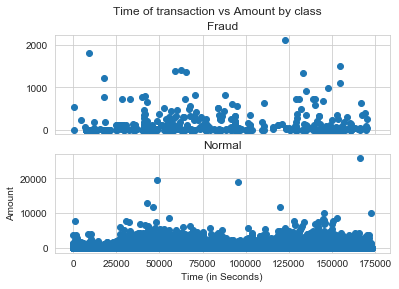

In [592]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

C:\Users\anili\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


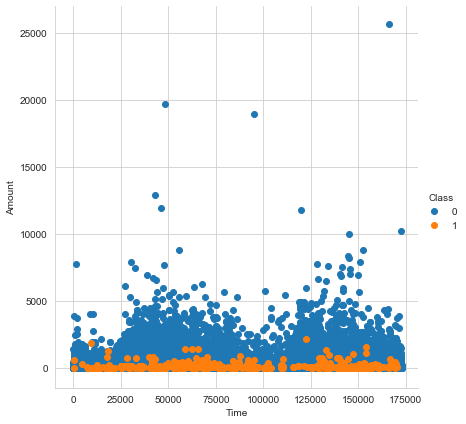

In [593]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

In [601]:
timedelta = pd.to_timedelta(data['Time'], unit='s')
data['Time_min'] = (timedelta.dt.components.minutes).astype(int)
data['Time_hour'] = (timedelta.dt.components.hours).astype(int)

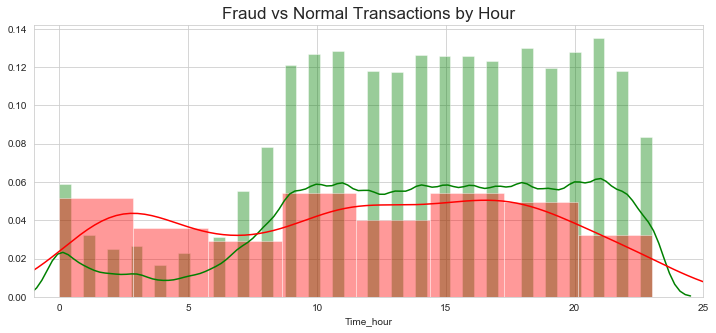

In [605]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(data[data['Class'] == 0]["Time_hour"], color='g')
sns.distplot(data[data['Class'] == 1]["Time_hour"], color='r')
plt.title('Fraud vs Normal Transactions by Hour', fontsize=17)
plt.xlim([-1,25])
plt.show()

## Scaling Data

Since the features are a wide range of numerical values and not on the same scale. Therefore, we would need to convert them or shrink them to the same level between a mean of 0 and standard deviation of 1.

In [524]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [526]:
from sklearn.preprocessing import StandardScaler

In [527]:
#scaler = StandardScaler()

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Partition data into train and test sets

In [528]:
from sklearn.model_selection import train_test_split

In [538]:
# split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split (X_smote, y_smote, test_size=0.33, random_state=101)

## Handle Imbalanced dataset using SMOTE

In [393]:
!pip3 install imblearn

As mentioned earlier, this file dontains a imbalanced dataset which means we barely have fraudulent transaction around %1 which could misleading our accuracy and biased predictions based on the majority class i.e.Normal transaction.Therefore, we would take a minority class and tried to create and match up the majority class sample.This is where SMOTE helps us to synthesize new artificial samples to match up the majority class.SMOTE does not create exact copies of observations but creates new, synthetic, samples that are quite similar to the existing observations in the minority class.

In [539]:
from imblearn.over_sampling import SMOTE

In [581]:
sm = SMOTE(random_state=42)

In [582]:
from collections import Counter

In [583]:
X_smote, y_smote=sm.fit_sample(X_train,y_train.ravel())

BEFORE SMOTE: Counter({0: 284315, 1: 492})
AFTER SMOTE: Counter({1: 127768, 0: 127768})


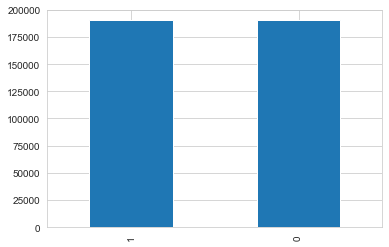

In [586]:
print('BEFORE SMOTE:', Counter (y))
pd.Series(y_train_new).value_counts().plot.bar()
print('AFTER SMOTE:', Counter (y_smote))

In [557]:
#pd.Series(y_res).value_counts().plot.bar()

In [587]:
X_smote.shape,y_smote.shape

((255536, 30), (255536,))

# Logistic Regression

As we have to predict the binary classes which means only two possible classes can be identifed. Therefore, it is wise to leverage the Logistic regression model which computes the probabity of an event occurance, which in this case is Normal vs Fraud transaction.

In [559]:
#fit the logistic regression model
from sklearn.linear_model import LogisticRegression

In [588]:
X_train,y_train=X_smote,y_smote

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)


In [589]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [590]:
#print('Confusion Matrix:' "\n",confusion_matrix (y_test, y_predict))
print(classification_report (y_test,y_predict))
#print('Model Accuracy:', accuracy_score (y_test, y_predict))
#pd.crosstab(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     62709
           1       0.97      0.92      0.95     63006

    accuracy                           0.95    125715
   macro avg       0.95      0.95      0.95    125715
weighted avg       0.95      0.95      0.95    125715



In [591]:
print('Model Accuracy:', accuracy_score (y_test, y_predict))
print('Recall:', recall_score (y_test, y_predict))
print('Precision:', precision_score (y_test, y_predict))
print('f1 Score:', f1_score (y_test, y_predict))

Model Accuracy: 0.9494968778586486
Recall: 0.9238961368758531
Precision: 0.9739981594578767
f1 Score: 0.9482858329735849


In [573]:
cf_matrix = (confusion_matrix (y_test, y_predict))
print(cf_matrix)

[[61155  1554]
 [ 4795 58211]]


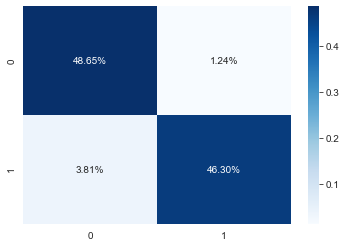

In [574]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

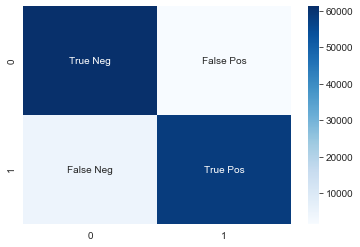

In [575]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

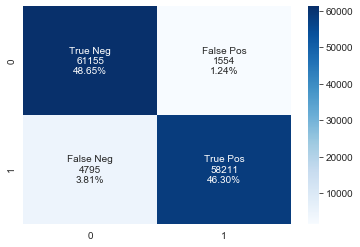

In [576]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

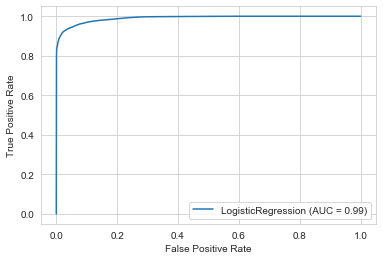

In [577]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve (lr, X_test, y_test)